# 1. 선형 SVM 분류

In [1]:
# 공통
import numpy as np
import os

# 일관된 출력을 위해 유사난수 초기화
np.random.seed(42)

# 맷플롯립 설정
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

## 1-1 하드 마진 분류 (Hard Margin Classification)

In [2]:
from sklearn.svm import SVC
from sklearn import datasets

iris = datasets.load_iris()
X = iris["data"][:, (2, 3)]  # 꽃잎 길이, 꽃잎 너비
y = iris["target"]

setosa_or_versicolor = (y == 0) | (y == 1)
X = X[setosa_or_versicolor]
y = y[setosa_or_versicolor]

# SVM 분류 모델
svm_clf = SVC(kernel="linear", C=float("inf"))
svm_clf.fit(X, y)

SVC(C=inf, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

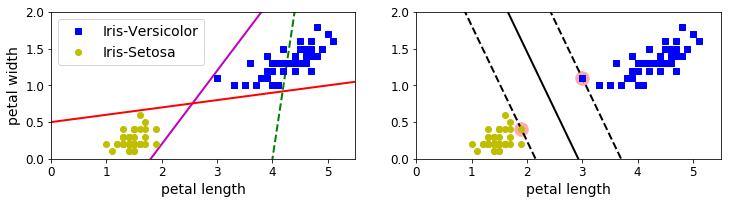

In [3]:
import numpy as np
import matplotlib.pyplot  as plt

# 나쁜 모델
x0 = np.linspace(0, 5.5, 200)
pred_1 = 5*x0 - 20
pred_2 = x0 - 1.8
pred_3 = 0.1 * x0 + 0.5

def plot_svc_decision_boundary(svm_clf, xmin, xmax):
    w = svm_clf.coef_[0]
    b = svm_clf.intercept_[0]

    # 결정 경계에서 w0*x0 + w1*x1 + b = 0 이므로
    # => x1 = -w0/w1 * x0 - b/w1
    x0 = np.linspace(xmin, xmax, 200)
    decision_boundary = -w[0]/w[1] * x0 - b/w[1]

    margin = 1/w[1]
    gutter_up = decision_boundary + margin
    gutter_down = decision_boundary - margin

    svs = svm_clf.support_vectors_
    plt.scatter(svs[:, 0], svs[:, 1], s=180, facecolors='#FFAAAA')
    plt.plot(x0, decision_boundary, "k-", linewidth=2)
    plt.plot(x0, gutter_up, "k--", linewidth=2)
    plt.plot(x0, gutter_down, "k--", linewidth=2)

plt.figure(figsize=(12,2.7))

plt.subplot(121)
plt.plot(x0, pred_1, "g--", linewidth=2)
plt.plot(x0, pred_2, "m-", linewidth=2)
plt.plot(x0, pred_3, "r-", linewidth=2)
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Iris-Versicolor")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Iris-Setosa")
plt.xlabel("petal length", fontsize=14)
plt.ylabel("petal width", fontsize=14)
plt.legend(loc="upper left", fontsize=14)
plt.axis([0, 5.5, 0, 2])

plt.subplot(122)
plot_svc_decision_boundary(svm_clf, 0, 5.5)
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo")
plt.xlabel("petal length", fontsize=14)
plt.axis([0, 5.5, 0, 2])

# save_fig("large_margin_classification_plot")
plt.show()

- 실선 : SVM decision boundary  /  초평면 (Hyperplane)
- 점선 : SVM (도로라고 비유)의 도로 경계 
- 서포트 벡터 : 도로 경계에 위치한 샘플

## 1-2 SVM은 특성 스케일에 민감함

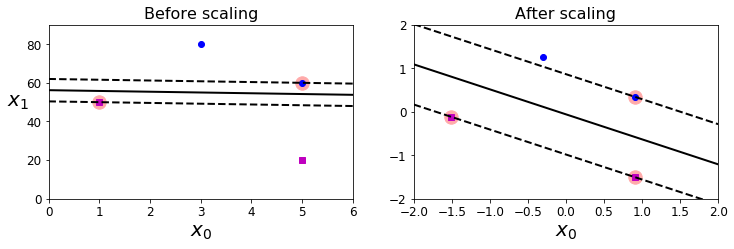

In [4]:
Xs = np.array([[1, 50], [5, 20], [3, 80], [5, 60]]).astype(np.float64)
ys = np.array([0, 0, 1, 1])
svm_clf = SVC(kernel="linear", C=100)
svm_clf.fit(Xs, ys)

plt.figure(figsize=(12,3.2))
plt.subplot(121)
plt.plot(Xs[:, 0][ys==1], Xs[:, 1][ys==1], "bo")
plt.plot(Xs[:, 0][ys==0], Xs[:, 1][ys==0], "ms")
plot_svc_decision_boundary(svm_clf, 0, 6)
plt.xlabel("$x_0$", fontsize=20)
plt.ylabel("$x_1$  ", fontsize=20, rotation=0)
plt.title("Before scaling", fontsize=16)
plt.axis([0, 6, 0, 90])

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(Xs)
svm_clf.fit(X_scaled, ys)

plt.subplot(122)
plt.plot(X_scaled[:, 0][ys==1], X_scaled[:, 1][ys==1], "bo")
plt.plot(X_scaled[:, 0][ys==0], X_scaled[:, 1][ys==0], "ms")
plot_svc_decision_boundary(svm_clf, -2, 2)
plt.xlabel("$x_0$", fontsize=20)
plt.title("After scaling", fontsize=16)
plt.axis([-2, 2, -2, 2])
plt.show()

어느 한 특성이 다른 특성에 비해 스케일이 너무 크면 SVM 분류기의 폭이 수평 또는 수직에 가까워지고 그 폭 또한 좁아진다.

## 1-3 하드 마진 분류는 이상치에 민감함

#### 하드 마진 분류의 문제점

1. 데이터가 선형적으로 구분될 수 있어야 작동한다.
2. 스케일에 민감하다.
3. 이상치에 민감하다.

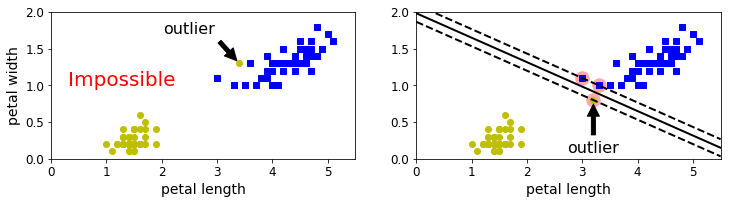

In [5]:
X_outliers = np.array([[3.4, 1.3], [3.2, 0.8]])
y_outliers = np.array([0, 0])
Xo1 = np.concatenate([X, X_outliers[:1]], axis=0)
yo1 = np.concatenate([y, y_outliers[:1]], axis=0)
Xo2 = np.concatenate([X, X_outliers[1:]], axis=0)
yo2 = np.concatenate([y, y_outliers[1:]], axis=0)

svm_clf2 = SVC(kernel="linear", C=10**9)
svm_clf2.fit(Xo2, yo2)

plt.figure(figsize=(12,2.7))

plt.subplot(121)
plt.plot(Xo1[:, 0][yo1==1], Xo1[:, 1][yo1==1], "bs")
plt.plot(Xo1[:, 0][yo1==0], Xo1[:, 1][yo1==0], "yo")
plt.text(0.3, 1.0, "Impossible", fontsize=20, color="red")
plt.xlabel("petal length", fontsize=14)
plt.ylabel("petal width", fontsize=14)
plt.annotate("outlier",
             xy=(X_outliers[0][0], X_outliers[0][1]),
             xytext=(2.5, 1.7),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.1),
             fontsize=16,
            )
plt.axis([0, 5.5, 0, 2])

plt.subplot(122)
plt.plot(Xo2[:, 0][yo2==1], Xo2[:, 1][yo2==1], "bs")
plt.plot(Xo2[:, 0][yo2==0], Xo2[:, 1][yo2==0], "yo")
plot_svc_decision_boundary(svm_clf2, 0, 5.5)
plt.xlabel("petal length", fontsize=14)
plt.annotate("outlier",
             xy=(X_outliers[1][0], X_outliers[1][1]),
             xytext=(3.2, 0.08),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.1),
             fontsize=16,
            )
plt.axis([0, 5.5, 0, 2])

# save_fig("sensitivity_to_outliers_plot")
plt.show()

1. 왼쪽 그림은 데이터가 선형적으로 분류될 수 없어서 svm이 작동하지 않는 것을 확인할 수 있다.

2. 오른쪽 그림은 단 하나의 이상치 데이터 샘플 때문에 경계폭이 확연히 줄어들었음을 볼 수 있다.

#### 소프트 마진 분류 (Soft Margin Classification) :    도로의 폭 vs 마진 오류 (Margin Violation)

###### C 하이퍼파라미터

C ↓ : 도로 폭 ↑ / 마진 오류 ↑

C ↑ : 도로 폭 ↓ / 마진 오류 ↓

In [6]:
import numpy as np
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

iris = datasets.load_iris()
X = iris["data"][:, (2, 3)]  # petal length, petal width
y = (iris["target"] == 2).astype(np.float64)  # Iris-Virginica

C:\Users\user\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


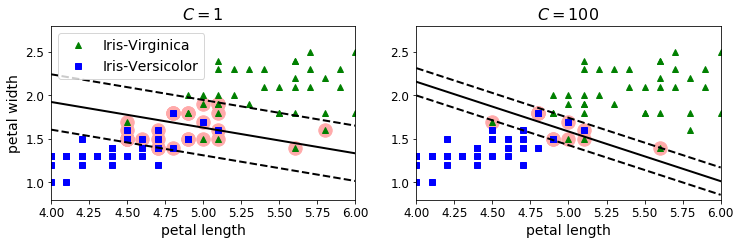

In [7]:
scaler = StandardScaler()
svm_clf1 = LinearSVC(C=1, loss="hinge", random_state=42)            # 작은 C
svm_clf2 = LinearSVC(C=100, loss="hinge", random_state=42)          # 큰 C

scaled_svm_clf1 = Pipeline([
        ("scaler", scaler),
        ("linear_svc", svm_clf1),
    ])
scaled_svm_clf2 = Pipeline([
        ("scaler", scaler),
        ("linear_svc", svm_clf2),
    ])

svm_clf1.fit(X,y)
svm_clf2.fit(X,y)

scaled_svm_clf1.fit(X, y)
scaled_svm_clf2.fit(X, y)

# 스케일되지 않은 파라미터로 변경
b1 = svm_clf1.decision_function([-scaler.mean_ / scaler.scale_])
b2 = svm_clf2.decision_function([-scaler.mean_ / scaler.scale_])
w1 = svm_clf1.coef_[0] / scaler.scale_
w2 = svm_clf2.coef_[0] / scaler.scale_
svm_clf1.intercept_ = np.array([b1])
svm_clf2.intercept_ = np.array([b2])
svm_clf1.coef_ = np.array([w1])
svm_clf2.coef_ = np.array([w2])

# 서포트 벡터 찾기 (libsvm과 달리 liblinear 라이브러리에서 제공하지 않기 때문에 
# LinearSVC에는 서포트 벡터가 저장되어 있지 않습니다.)
t = y * 2 - 1
support_vectors_idx1 = (t * (X.dot(w1) + b1) < 1).ravel()
support_vectors_idx2 = (t * (X.dot(w2) + b2) < 1).ravel()
svm_clf1.support_vectors_ = X[support_vectors_idx1]
svm_clf2.support_vectors_ = X[support_vectors_idx2]

plt.figure(figsize=(12,3.2))
plt.subplot(121)
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^", label="Iris-Virginica")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs", label="Iris-Versicolor")
plot_svc_decision_boundary(svm_clf1, 4, 6)
plt.xlabel("petal length", fontsize=14)
plt.ylabel("petal width", fontsize=14)
plt.legend(loc="upper left", fontsize=14)
plt.title("$C = {}$".format(svm_clf1.C), fontsize=16)
plt.axis([4, 6, 0.8, 2.8])

plt.subplot(122)
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
plot_svc_decision_boundary(svm_clf2, 4, 6)
plt.xlabel("petal length", fontsize=14)
plt.title("$C = {}$".format(svm_clf2.C), fontsize=16)
plt.axis([4, 6, 0.8, 2.8])

# save_fig("regularization_plot")
plt.show()

###### C 하이퍼파라미터

C ↓ : 도로 폭 ↑ / 마진 오류 ↑

C ↑ : 도로 폭 ↓ / 마진 오류 ↓

당장 훈련을 시킬 때에는 C가 클 때, 즉 도로의 폭이 좁을 때 마진 오류가 작지만

실제로 예측을 할 때는 C가 작을 때, 즉 도로의 폭이 보다 넓을 때 예측 에러가 더 작게 나올 것이다.

왜냐하면 C가 크면 훈련셋에 overfit될 확률이 높고 폭이 좁아서 새로운 샘플에 대해서 정확하게 예측할 수 있는 허용되는 범위가 좁아지기 때문이다.


##### 또한 대부분의 마진 오류는 결정 경계를 기준으로 올바른 클래스로 분류되기 때문에 예측 에러는 마진 오류보다 작다

SVM 모델이 overfit 됐을 때 C를 감소시키면 모델이 규제되므로 어느 정도 문제를 해결할 수 있다.

In [8]:
svm_clf.predict([[5.5, 1.7]])

array([1])

# 2. 비선형 SVM 분류

선형적으로 데이터셋을 분류할 수 없는 경우에는 

#### 다항 특성과 새로운 특성을 추가하여 비선형으로 분류할 수 있다.

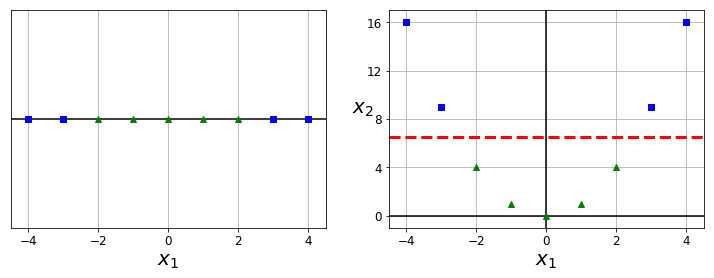

In [9]:
X1D = np.linspace(-4, 4, 9).reshape(-1, 1)
X2D = np.c_[X1D, X1D**2]
y = np.array([0, 0, 1, 1, 1, 1, 1, 0, 0])

plt.figure(figsize=(11, 4))

plt.subplot(121)
plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.plot(X1D[:, 0][y==0], np.zeros(4), "bs")
plt.plot(X1D[:, 0][y==1], np.zeros(5), "g^")
plt.gca().get_yaxis().set_ticks([])
plt.xlabel(r"$x_1$", fontsize=20)
plt.axis([-4.5, 4.5, -0.2, 0.2])

plt.subplot(122)
plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.plot(X2D[:, 0][y==0], X2D[:, 1][y==0], "bs")
plt.plot(X2D[:, 0][y==1], X2D[:, 1][y==1], "g^")
plt.xlabel(r"$x_1$", fontsize=20)
plt.ylabel(r"$x_2$", fontsize=20, rotation=0)
plt.gca().get_yaxis().set_ticks([0, 4, 8, 12, 16])
plt.plot([-4.5, 4.5], [6.5, 6.5], "r--", linewidth=3)
plt.axis([-4.5, 4.5, -1, 17])

plt.subplots_adjust(right=1)

# save_fig("higher_dimensions_plot", tight_layout=False)
plt.show()

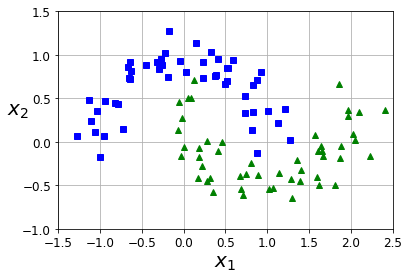

In [10]:
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=100, noise=0.15, random_state=42)

def plot_dataset(X, y, axes):
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
    plt.axis(axes)
    plt.grid(True, which='both')
    plt.xlabel(r"$x_1$", fontsize=20)
    plt.ylabel(r"$x_2$", fontsize=20, rotation=0)

plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.show()

In [11]:
from sklearn.datasets import make_moons
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

polynomial_svm_clf = Pipeline([
        ("poly_features", PolynomialFeatures(degree=3)),            # 3차 다항식
        ("scaler", StandardScaler()),
        ("svm_clf", LinearSVC(C=10, loss="hinge", max_iter=2000, random_state=42))
    ])

polynomial_svm_clf.fit(X, y)

Pipeline(memory=None,
     steps=[('poly_features', PolynomialFeatures(degree=3, include_bias=True, interaction_only=False)), ('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('svm_clf', LinearSVC(C=10, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='hinge', max_iter=2000, multi_class='ovr',
     penalty='l2', random_state=42, tol=0.0001, verbose=0))])

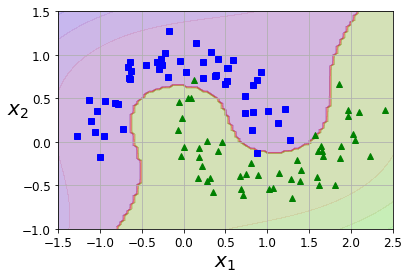

In [12]:
def plot_predictions(clf, axes):
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    X = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X).reshape(x0.shape)
    y_decision = clf.decision_function(X).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)
    plt.contourf(x0, x1, y_decision, cmap=plt.cm.brg, alpha=0.1)

plot_predictions(polynomial_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])

# save_fig("moons_polynomial_svc_plot")
plt.show()

## 2-1. 다항식 커널

다항식 특성을 추가하는 것은 간단하고 모든 머신러닝 알고리즘에서 잘 작동하지만,

1. 낮은 차수의 다항식은 복잡한 데이터셋을 잘 표현하지 못하고
2. 높은 차수의 다항식은 굉장히 많은 특성을 추가하므로 모델을 느리게 한다.

#### 다행히 SVM을 사용할 땐 커널 트릭(kernel trick)을 통해서 실제로 특성을 추가하지 않고도 다항식 특성을 추가한 것과 같은 효과를 낼 수 있다.

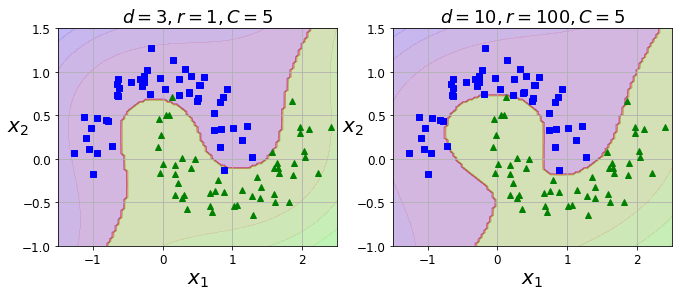

In [13]:
from sklearn.svm import SVC

poly_kernel_svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel="poly", degree=3, coef0=1, C=5))           # 3차 다항식
    ])
poly_kernel_svm_clf.fit(X, y)

poly100_kernel_svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel="poly", degree=10, coef0=100, C=5))      # 10차 다항식
    ])
poly100_kernel_svm_clf.fit(X, y)


plt.figure(figsize=(11, 4))

plt.subplot(121)
plot_predictions(poly_kernel_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.title(r"$d=3, r=1, C=5$", fontsize=18)

plt.subplot(122)
plot_predictions(poly100_kernel_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.title(r"$d=10, r=100, C=5$", fontsize=18)

# save_fig("moons_kernelized_polynomial_svc_plot")
plt.show()

모델의 overfit / underfit 문제는 차수 (degree)를 조절함으로써 해결할 수 있다.

#### coef0 매개변수는 모델이 높은 차수와 낮은 차수에 얼마나 영향을 받을지 조절하는 매개변수이다.

다항식 커널의 상수항 r이다. 차수가 높아질수록 1보다 작은 값과 1보다 큰 값의 차이가 크게 벌어지므로 coef0를 적절히 지정하면 고차항의 영향을 줄일 수 있다. 기본값은 0이다.

https://en.wikipedia.org/wiki/Polynomial_kernel#cite_note-2

## 2-2. 유사도 특성

선형적으로 데이터셋이 분류가 안될 때 쓰는 또 다른 기법은
#### 각 샘플이 특정 랜드마크와 얼마나 닮았는지 측정하는 유사도 함수(similarity function)로 계산한 특성을 추가하는 것이다.

식 5-1 가우시안 RBF

$  \phi_\gamma(\mathbf{x},\mathit{l}) = \exp(-\gamma \left\lVert \mathbf{x},\mathit{l}\right\lVert^2)  $

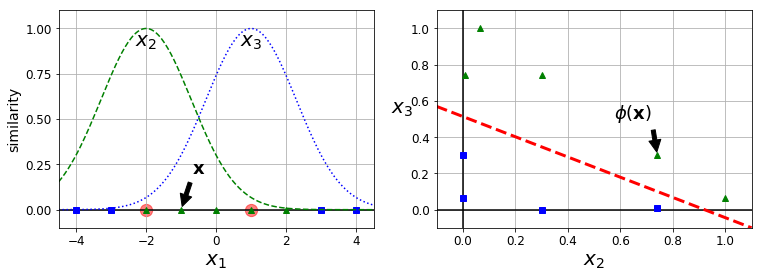

In [14]:
def gaussian_rbf(x, landmark, gamma):
    return np.exp(-gamma * np.linalg.norm(x - landmark, axis=1)**2)

gamma = 0.3

x1s = np.linspace(-4.5, 4.5, 200).reshape(-1, 1)
x2s = gaussian_rbf(x1s, -2, gamma)
x3s = gaussian_rbf(x1s, 1, gamma)

XK = np.c_[gaussian_rbf(X1D, -2, gamma), gaussian_rbf(X1D, 1, gamma)]
yk = np.array([0, 0, 1, 1, 1, 1, 1, 0, 0])

plt.figure(figsize=(11, 4))

plt.subplot(121)
plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.scatter(x=[-2, 1], y=[0, 0], s=150, alpha=0.5, c="red")
plt.plot(X1D[:, 0][yk==0], np.zeros(4), "bs")
plt.plot(X1D[:, 0][yk==1], np.zeros(5), "g^")
plt.plot(x1s, x2s, "g--")
plt.plot(x1s, x3s, "b:")
plt.gca().get_yaxis().set_ticks([0, 0.25, 0.5, 0.75, 1])
plt.xlabel(r"$x_1$", fontsize=20)
plt.ylabel(r"similarity", fontsize=14)
plt.annotate(r'$\mathbf{x}$',
             xy=(X1D[3, 0], 0),
             xytext=(-0.5, 0.20),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.1),
             fontsize=18,
            )
plt.text(-2, 0.9, "$x_2$", ha="center", fontsize=20)
plt.text(1, 0.9, "$x_3$", ha="center", fontsize=20)
plt.axis([-4.5, 4.5, -0.1, 1.1])

plt.subplot(122)
plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.plot(XK[:, 0][yk==0], XK[:, 1][yk==0], "bs")
plt.plot(XK[:, 0][yk==1], XK[:, 1][yk==1], "g^")
plt.xlabel(r"$x_2$", fontsize=20)
plt.ylabel(r"$x_3$  ", fontsize=20, rotation=0)
plt.annotate(r'$\phi\left(\mathbf{x}\right)$',
             xy=(XK[3, 0], XK[3, 1]),
             xytext=(0.65, 0.50),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.1),
             fontsize=18,
            )
plt.plot([-0.1, 1.1], [0.57, -0.1], "r--", linewidth=3)
plt.axis([-0.1, 1.1, -0.1, 1.1])
    
plt.subplots_adjust(right=1)

# save_fig("kernel_method_plot")
plt.show()

In [15]:
x1_example = X1D[3, 0]
for landmark in (-2, 1):
    k = gaussian_rbf(np.array([[x1_example]]), np.array([[landmark]]), gamma)
    print("Phi({}, {}) = {}".format(x1_example, landmark, k))

Phi(-1.0, -2) = [0.74081822]
Phi(-1.0, 1) = [0.30119421]


(랜드마크에서 아주 먼 위치, 유사도 ↓) 0 <= RBF <= 1 (랜드마크와 같은 위치, 유사도 ↑)

보통 랜드마크는 보든 샘플을 다 사용한다. 그렇게 하면 샘플 수 m만큼 차원이 증가한다. 

- 장 : 선형적으로 구분될 가능성이 높아진다.
- 단 : 특성이 샘플 수 만큼 증가해서 계산량이 많아진다. sparse해진다.

## 2-3. 가우시안 RBF 커널

유사도 특성 역시 커널 트릭을 통해 계산량을 늘리지 않고 특성을 추가한 것과 같은 효과를 낼 수 있다.

In [16]:
rbf_kernel_svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel="rbf", gamma=5, C=0.001))
    ])
rbf_kernel_svm_clf.fit(X, y)

Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('svm_clf', SVC(C=0.001, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=5, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))])

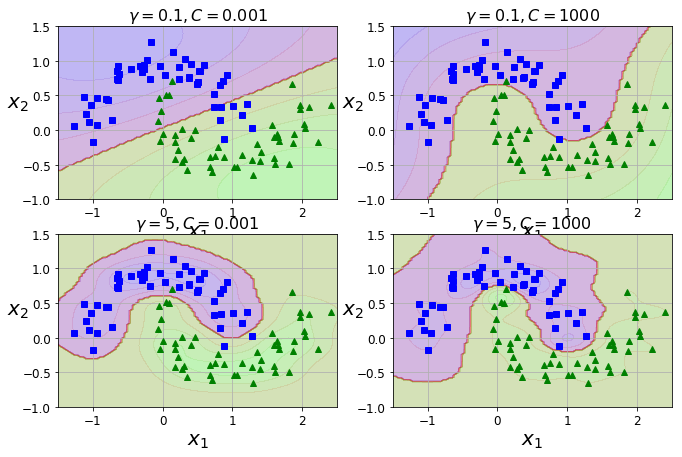

In [17]:
from sklearn.svm import SVC

gamma1, gamma2 = 0.1, 5
C1, C2 = 0.001, 1000
hyperparams = (gamma1, C1), (gamma1, C2), (gamma2, C1), (gamma2, C2)

svm_clfs = []
for gamma, C in hyperparams:
    rbf_kernel_svm_clf = Pipeline([
            ("scaler", StandardScaler()),
            ("svm_clf", SVC(kernel="rbf", gamma=gamma, C=C))
        ])
    rbf_kernel_svm_clf.fit(X, y)
    svm_clfs.append(rbf_kernel_svm_clf)

plt.figure(figsize=(11, 7))

for i, svm_clf in enumerate(svm_clfs):
    plt.subplot(221 + i)
    plot_predictions(svm_clf, [-1.5, 2.5, -1, 1.5])
    plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
    gamma, C = hyperparams[i]
    plt.title(r"$\gamma = {}, C = {}$".format(gamma, C), fontsize=16)

# save_fig("moons_rbf_svc_plot")
plt.show()

$\gamma$ ↑ → 종 모양이 좁아지고, 각 샘플의 영향 범위가 작아진다. 

$\gamma$=0.1이었 때 유사도가 0.5였다면 $\gamma$=5가 됐을 때 유사도가 0.2가 된다.

즉, 같은 샘플이라고 하더라도 $\gamma$가 증가함에 따라 샘플 간의 거리가 좁아진다.

샘플 간의 거리가 좁아진 공간에서 다른 조건은 동일하게 유지하여 모델을 학습시키면 decision boundary가 더 불규칙해질 것이다. 

왜냐하면 허용 오차의 수준은 유지가 되는데 샘플 간의 거리가 더 좁아져서 그 수준을 유지하기 위해선 각 샘플들을 따라서 decision boundary가 울퉁불퉁해져야 하기 때문이다.

즉 $\gamma$가 증가하면 모델의 분산이 증가하고 편향은 감소하는 효과를 내게 된다.

모델의 overfit / underfit 문제를 해결하기 위해선 $\gamma$와 C를 함께 조정해주면 된다.

## 2-4. 계산 복잡도

|  <center>파이썬 클래스</center> |  <center>시간 복잡도</center> |  <center>외부 메모리 학습 지원</center> |  <center>스케일 조정의 필요성 |  <center>커널 트릭</center> |
|:--------|:--------:|--------:|
|**<center>LinearSVC</center>**| <center> $O(m \times n)$ </center> |<center>No</center> |<center>Yes</center> |<center>No</center> |
|**<center>SGDClassifier</center>**| <center> $O(m \times n)$ </center> |<center>Yes</center> |<center>Yes</center> |<center>No</center> |
|**<center>SVC</center>**| <center> $O(m^2 \times n)$ ~ $O(m^3 \times n)$ </center> |<center>No</center> |<center>Yes</center> |<center>Yes</center> |

# 3. SVM 회귀

SVM 회귀는 분류와는 정 반대로 생각하면 된다. 

제한된 마진 오류 (도로 밖의 샘플) 안에서 도로 안에 가능한 한 많은 샘플이 들어가도록 학습한다.

도로의 폭은 $\epsilon$으로 조절한다.

https://kr.mathworks.com/help/stats/understanding-support-vector-machine-regression.html

In [18]:
np.random.seed(42)
m = 50
X = 2 * np.random.rand(m, 1)
y = (4 + 3 * X + np.random.randn(m, 1)).ravel()

from sklearn.svm import LinearSVR

svm_reg = LinearSVR(epsilon=1.5, random_state=42)
svm_reg.fit(X, y)

LinearSVR(C=1.0, dual=True, epsilon=1.5, fit_intercept=True,
     intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=1000,
     random_state=42, tol=0.0001, verbose=0)

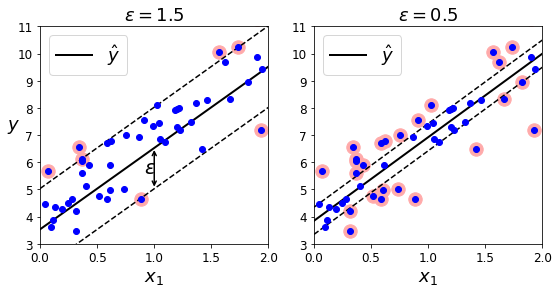

In [19]:
svm_reg1 = LinearSVR(epsilon=1.5, random_state=42)
svm_reg2 = LinearSVR(epsilon=0.5, random_state=42)
svm_reg1.fit(X, y)
svm_reg2.fit(X, y)

def find_support_vectors(svm_reg, X, y):
    y_pred = svm_reg.predict(X)
    off_margin = (np.abs(y - y_pred) >= svm_reg.epsilon)
    return np.argwhere(off_margin)

svm_reg1.support_ = find_support_vectors(svm_reg1, X, y)
svm_reg2.support_ = find_support_vectors(svm_reg2, X, y)

eps_x1 = 1
eps_y_pred = svm_reg1.predict([[eps_x1]])

def plot_svm_regression(svm_reg, X, y, axes):
    x1s = np.linspace(axes[0], axes[1], 100).reshape(100, 1)
    y_pred = svm_reg.predict(x1s)
    plt.plot(x1s, y_pred, "k-", linewidth=2, label=r"$\hat{y}$")
    plt.plot(x1s, y_pred + svm_reg.epsilon, "k--")
    plt.plot(x1s, y_pred - svm_reg.epsilon, "k--")
    plt.scatter(X[svm_reg.support_], y[svm_reg.support_], s=180, facecolors='#FFAAAA')
    plt.plot(X, y, "bo")
    plt.xlabel(r"$x_1$", fontsize=18)
    plt.legend(loc="upper left", fontsize=18)
    plt.axis(axes)

plt.figure(figsize=(9, 4))
plt.subplot(121)
plot_svm_regression(svm_reg1, X, y, [0, 2, 3, 11])
plt.title(r"$\epsilon = {}$".format(svm_reg1.epsilon), fontsize=18)
plt.ylabel(r"$y$", fontsize=18, rotation=0)
#plt.plot([eps_x1, eps_x1], [eps_y_pred, eps_y_pred - svm_reg1.epsilon], "k-", linewidth=2)
plt.annotate(
        '', xy=(eps_x1, eps_y_pred), xycoords='data',
        xytext=(eps_x1, eps_y_pred - svm_reg1.epsilon),
        textcoords='data', arrowprops={'arrowstyle': '<->', 'linewidth': 1.5}
    )
plt.text(0.91, 5.6, r"$\epsilon$", fontsize=20)
plt.subplot(122)
plot_svm_regression(svm_reg2, X, y, [0, 2, 3, 11])
plt.title(r"$\epsilon = {}$".format(svm_reg2.epsilon), fontsize=18)
# save_fig("svm_regression_plot")
plt.show()

마진 안에서는 훈련 샘플이 추가되어도 모델의 예측에는 영향이 없다. 그래서 이 모델은 $\epsilon$에 민감하지 않다 ($\epsilon$-insensitive)

The linear ε-insensitive loss function ignores errors that are within ε distance of the observed value by treating them as equal to zero. The loss is measured based on the distance between observed value y and the ε boundary. This is formally described by

$ L_\epsilon = 
    \begin{cases}
    0 & \mbox{if } \left \vert y-f(x) \right \vert \le \epsilon \\
    \left \vert y-f(x)-\epsilon \right \vert & \mbox{otherwise}
    \end{cases}$

In [20]:
np.random.seed(42)
m = 100
X = 2 * np.random.rand(m, 1) - 1
y = (0.2 + 0.1 * X + 0.5 * X**2 + np.random.randn(m, 1)/10).ravel()

from sklearn.svm import SVR

svm_poly_reg = SVR(kernel="poly", gamma='auto', degree=2, C=100, epsilon=0.1)
svm_poly_reg.fit(X, y)

SVR(C=100, cache_size=200, coef0=0.0, degree=2, epsilon=0.1, gamma='auto',
  kernel='poly', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [21]:
from sklearn.svm import SVR

svm_poly_reg1 = SVR(kernel="poly", gamma='auto', degree=2, C=100, epsilon=0.1)
svm_poly_reg2 = SVR(kernel="poly", gamma='auto', degree=2, C=0.01, epsilon=0.1)
svm_poly_reg1.fit(X, y)
svm_poly_reg2.fit(X, y)

SVR(C=0.01, cache_size=200, coef0=0.0, degree=2, epsilon=0.1, gamma='auto',
  kernel='poly', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

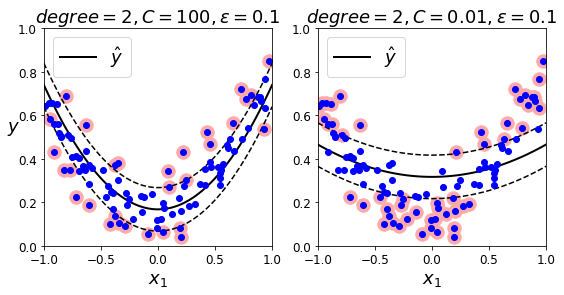

In [22]:
plt.figure(figsize=(9, 4))
plt.subplot(121)
plot_svm_regression(svm_poly_reg1, X, y, [-1, 1, 0, 1])
plt.title(r"$degree={}, C={}, \epsilon = {}$".format(svm_poly_reg1.degree, svm_poly_reg1.C, svm_poly_reg1.epsilon), fontsize=18)
plt.ylabel(r"$y$", fontsize=18, rotation=0)
plt.subplot(122)
plot_svm_regression(svm_poly_reg2, X, y, [-1, 1, 0, 1])
plt.title(r"$degree={}, C={}, \epsilon = {}$".format(svm_poly_reg2.degree, svm_poly_reg2.C, svm_poly_reg2.epsilon), fontsize=18)
# save_fig("svm_with_polynomial_kernel_plot")
plt.show()

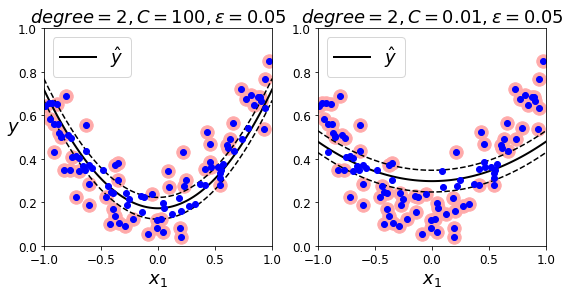

In [23]:
svm_poly_reg3 = SVR(kernel="poly", gamma='auto', degree=2, C=100, epsilon=0.05)
svm_poly_reg4 = SVR(kernel="poly", gamma='auto', degree=2, C=0.01, epsilon=0.05)
svm_poly_reg3.fit(X, y)
svm_poly_reg4.fit(X, y)

plt.figure(figsize=(9, 4))
plt.subplot(121)
plot_svm_regression(svm_poly_reg3, X, y, [-1, 1, 0, 1])
plt.title(r"$degree={}, C={}, \epsilon = {}$".format(svm_poly_reg3.degree, svm_poly_reg3.C, svm_poly_reg3.epsilon), fontsize=18)
plt.ylabel(r"$y$", fontsize=18, rotation=0)
plt.subplot(122)
plot_svm_regression(svm_poly_reg4, X, y, [-1, 1, 0, 1])
plt.title(r"$degree={}, C={}, \epsilon = {}$".format(svm_poly_reg4.degree, svm_poly_reg4.C, svm_poly_reg4.epsilon), fontsize=18)
# save_fig("svm_with_polynomial_kernel_plot")
plt.show()

# 4. SVM 이론

## 4-1. 결정 함수와 예측

$ \hat{y} = 
    \begin{cases}
    0 & \mathbf{w}^T \cdot \mathbf{x} + b < 0 일 때 \\
    1 & \mathbf{w}^T \cdot \mathbf{x} + b \ge 0 일 때 
    \end{cases}$

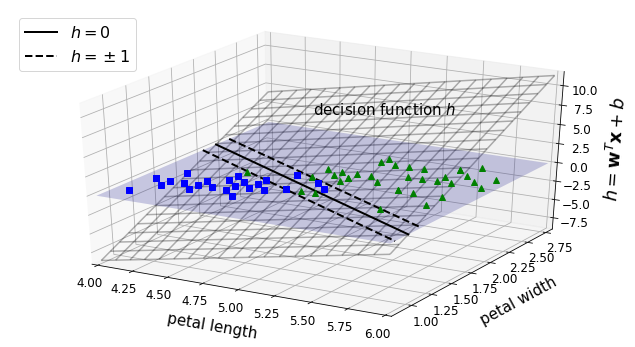

In [24]:
iris = datasets.load_iris()
X = iris["data"][:, (2, 3)]  # petal length, petal width
y = (iris["target"] == 2).astype(np.float64)  # Iris-Virginica

from mpl_toolkits.mplot3d import Axes3D

def plot_3D_decision_function(ax, w, b, x1_lim=[4, 6], x2_lim=[0.8, 2.8]):
    x1_in_bounds = (X[:, 0] > x1_lim[0]) & (X[:, 0] < x1_lim[1])
    X_crop = X[x1_in_bounds]
    y_crop = y[x1_in_bounds]
    x1s = np.linspace(x1_lim[0], x1_lim[1], 20)
    x2s = np.linspace(x2_lim[0], x2_lim[1], 20)
    x1, x2 = np.meshgrid(x1s, x2s)
    xs = np.c_[x1.ravel(), x2.ravel()]
    df = (xs.dot(w) + b).reshape(x1.shape)
    m = 1 / np.linalg.norm(w)
    boundary_x2s = -x1s*(w[0]/w[1])-b/w[1]
    margin_x2s_1 = -x1s*(w[0]/w[1])-(b-1)/w[1]
    margin_x2s_2 = -x1s*(w[0]/w[1])-(b+1)/w[1]
    ax.plot_surface(x1s, x2, np.zeros_like(x1),
                    color="b", alpha=0.2, cstride=100, rstride=100)
    ax.plot(x1s, boundary_x2s, 0, "k-", linewidth=2, label=r"$h=0$")
    ax.plot(x1s, margin_x2s_1, 0, "k--", linewidth=2, label=r"$h=\pm 1$")
    ax.plot(x1s, margin_x2s_2, 0, "k--", linewidth=2)
    ax.plot(X_crop[:, 0][y_crop==1], X_crop[:, 1][y_crop==1], 0, "g^")
    ax.plot_wireframe(x1, x2, df, alpha=0.3, color="k")
    ax.plot(X_crop[:, 0][y_crop==0], X_crop[:, 1][y_crop==0], 0, "bs")
    ax.axis(x1_lim + x2_lim)
    ax.text(4.5, 2.5, 3.8, "decision function $h$", fontsize=15)
    ax.set_xlabel(r"petal length", fontsize=15, labelpad=15)
    ax.set_ylabel(r"petal width", fontsize=15, rotation=25, labelpad=15)
    ax.set_zlabel(r"$h = \mathbf{w}^T \mathbf{x} + b$", fontsize=18, labelpad=10)
    ax.legend(loc="upper left", fontsize=16)

fig = plt.figure(figsize=(11, 6))
ax1 = fig.add_subplot(111, projection='3d')
plot_3D_decision_function(ax1, w=svm_clf2.coef_[0], b=svm_clf2.intercept_[0])

# save_fig("iris_3D_plot", tight_layout=False)
plt.show()

결정 함수 h $ \mathbf{w}^T \cdot \mathbf{x} + b $ 가 0이 되는 점들, 즉 두 평면의 교차점인 결정 결계가 초평면이다.

결정 함수의 값이 $\pm 1$인 점들이 점선으로 나타나고 이 점선이 곧 마진을 형성한다.

선형 SVM 분류기를 훈련하는 것은 마진 오류를 하나도 발생시키지 않거나 (하드마진) 제한적인 마진 오류를 가지면서 (소프트 마진) 가능한 한 마진을 크게 하는 $ \mathbf{w} $ 와 $b$를 찾는 것이다.

## 4-2. 목적 함수

결정 함수의 기울기는 가중치 벡터의 노름 $\left\lVert w \right\lVert$와 같다.

이 기울기를 2로 나누면 결정 함수의 값이 $\pm 1$인 점선들이 2배 멀어진다.

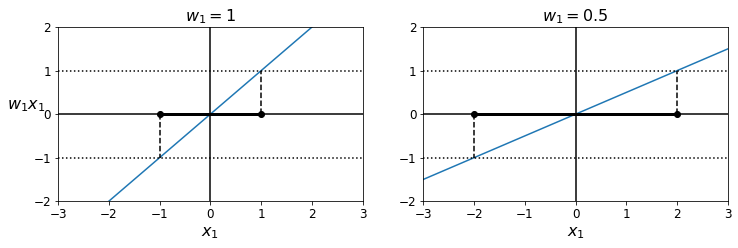

In [25]:
def plot_2D_decision_function(w, b, ylabel=True, x1_lim=[-3, 3]):
    x1 = np.linspace(x1_lim[0], x1_lim[1], 200)
    y = w * x1 + b
    m = 1 / w

    plt.plot(x1, y)
    plt.plot(x1_lim, [1, 1], "k:")
    plt.plot(x1_lim, [-1, -1], "k:")
    plt.axhline(y=0, color='k')
    plt.axvline(x=0, color='k')
    plt.plot([m, m], [0, 1], "k--")
    plt.plot([-m, -m], [0, -1], "k--")
    plt.plot([-m, m], [0, 0], "k-o", linewidth=3)
    plt.axis(x1_lim + [-2, 2])
    plt.xlabel(r"$x_1$", fontsize=16)
    if ylabel:
        plt.ylabel(r"$w_1 x_1$  ", rotation=0, fontsize=16)
    plt.title(r"$w_1 = {}$".format(w), fontsize=16)

plt.figure(figsize=(12, 3.2))
plt.subplot(121)
plot_2D_decision_function(1, 0)
plt.subplot(122)
plot_2D_decision_function(0.5, 0, ylabel=False)
# save_fig("small_w_large_margin_plot")
plt.show()

마진을 크게 하기 위해선 $\left\lVert w \right\lVert$를 최소화해야 한다.

하드 마진의 경우 결정 함수 값이 모든 양성 샘플에 대해서는 1보다 커야되고 모든 음성 샘플에 대해서는 -1보다 작아야 하므로

$\begin{cases}
    t^{(i)} = -1 & 음성 샘플 (y^{(i)} = 0) 일 때 \\
    t^{(i)} = 1 & 양성 샘플 (y^{(i)} = 1) 일 때 
    \end{cases}$
    
로 정의하면 앞선 모든 제약들이 $ t^{(i)} (\mathbf{w}^T \cdot \mathbf{x}^{(i)} + b) \ge 1$ 로 표현 가능하다.

#### 하드 마진 선형 SVM 분류기의 목적 함수

$ \underset{\mathbf{w},b} {minimize} \frac{1}{2}\mathbf{w}^T \cdot \mathbf{w}$

[조건] $ i=1,2,\cdots , m $  일 때  $\quad$ $t^{(i)} (\mathbf{w}^T \cdot \mathbf{x}^{(i)} + b) \ge 1$

$\left\lVert w \right\lVert$ 대신  $ \frac{1}{2} \left\lVert w \right\lVert ^2 $인  $\frac{1}{2}\mathbf{w}^T \cdot \mathbf{w}$를 최소화하는 이유는  $\left\lVert w \right\lVert$ 가 $\mathbf{w}=0$에서 미분되지 않기 때문이다.

#### 소프트 마진 선형 SVM 분류기의 목적 함수

$ \underset{\mathbf{w},b, \zeta} {minimize} \frac{1}{2}\mathbf{w}^T \cdot \mathbf{w} + C\sum_{i=1}^m \zeta^{(i)}$

[조건] $ i=1,2,\cdots , m $  일 때 $\quad$   $t^{(i)} (\mathbf{w}^T \cdot \mathbf{x}^{(i)} + b) \ge 1 - \zeta^{(i)}$ 이고 $\quad$  $\zeta^{(i)} \ge0$

소프트 마진의 경우 모든 샘플을 선형적으로 분류할 수 없기 때문에 모델에 어느 정도 마진 오류를 허용해주기 위해서 각 샘플에 대해 

슬랙 변수(slack variable)  $\zeta^{(i)} \ge0$를 도입해준다.

 $\zeta^{(i)}$는 $i$ 번째 샘플이 얼마나 마진을 위반할지 정한다.

하이퍼파라미터 C를 조정해줌으로써 
- 마진 오류를 최소화하기 위해 가능한 한 슬랙 변수의 값을 작게 만듦과 동시에
- 마진을 크게 하기 위해 (도로의 폭을 넓게 하기 위해)  $\frac{1}{2}\mathbf{w}^T \cdot \mathbf{w}$를 가능한 한 작게 만들어야 한다.

## 4-3. 커널 SVM

#### 2차 다항식 매핑

$ \phi(\mathbf{x}) = \phi\left(\begin{pmatrix} x_1 \\ x_2 \end{pmatrix} \right) = \begin{pmatrix} x_1^2  \\ \sqrt{2}x_1x_2 \\ x_2^2 \end{pmatrix}$

매핑 함수 $\phi$를 적용하면 원래의 2차원 벡터는 3차원으로 변환된다. 

#### 2차 다항식 매핑을 위한 커널 트릭

$ \phi(\mathbf{a}^T) \cdot \phi(\mathbf{b}) = \begin{pmatrix} a_1^2  \\ \sqrt{2}a_1a_2 \\ a_2^2 \end{pmatrix}^T \cdot \begin{pmatrix} b_1^2  \\ \sqrt{2}b_1b_2 \\ b_2^2 \end{pmatrix}$

$= a_1^2b_1^2 + 2a_1b_1a_2b_2 + a_2^2b_2^2 $

$= (a_1b_1 + a_2b_2)^2 $

$= \left(\begin{pmatrix} a_1 \\ a_2 \end{pmatrix}^T \cdot \begin{pmatrix} b_1 \\ b_2 \end{pmatrix}\right)^2 = (\mathbf{a}^T \cdot \mathbf{b})^2$

두 개의 2차원 벡터 $\mathbf{a}$와 $\mathbf{b}$에 2차 다항식 매핑 $\phi$를 적용한 다음 변환된 벡터로 점곱 (dot product)를 하면

원래 벡터의 점곱의 제곱과 같다.

따라서 매핑 함수 $\phi$가 정의됐다면 실제로 훈련 샘플을 변환할 필요 없이 단순히 기존 벡터의 점곱 형태로도 같은 결과를 낼 수 있다.

머신러닝에서 커널은 변환 $\phi$를 계산하지 않고 원래 벡터 $\mathbf{a}$와 $\mathbf{b}$에 기반하여 점곱 $\phi\left(\mathbf{a}\right)^T \cdot \phi\left(\mathbf{b}\right)$를 계산할 수 있는 함수이다.

#### 일반적인 커널

- 선형 : $K\left(\mathbf{a},\mathbf{b}\right) = \mathbf{a}^T \cdot \mathbf{b}$
- 다항식 : $ K\left(\mathbf{a},\mathbf{b}\right) = \left( \gamma \mathbf{a}^T \cdot \mathbf{b} + r  \right)^d$
- 가우시안 RBF : $ K\left(\mathbf{a},\mathbf{b}\right) = \exp  \left( -\gamma \left\lVert \mathbf{a} - \mathbf{b} \right\lVert^2  \right)$
- 시그모이드 : $ K\left(\mathbf{a},\mathbf{b}\right) = \tanh \left( \gamma \mathbf{a}^T \cdot \mathbf{b} + r  \right) $